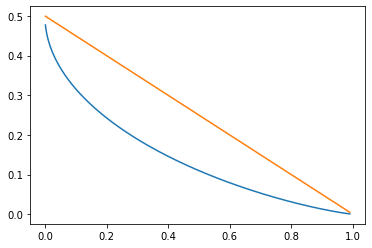

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math

def h2(p):
    """Binary Shannon Entropy"""
    entropy = -p*math.log(p,2) - (1-p)*math.log(1-p,2)
    return entropy

# Make a list of p values and a list of corresponding h2 values
plist = np.arange(0.0001, 0.5, 0.0001 )
hlist = [h2(p) for p in plist]
# plt.plot(hlist, plist)
# plt.show()

# Make an interpolating function but make hlist the argument and plist the dependent
# value.  So then this interpolating function becomes a quick-n-dirty inverse of h2
# h2inv will take an argument that's an h2 value, and return the corresponding p value
h2inv = interpolate.interp1d(hlist, plist)
# x = np.linspace(0.0015, 0.9999, 10000)
# plt.plot(x,h2inv(x))
# plt.show()

def errProbLoBound(mi):
    """Given an mi value, this returns the Fano-limit lower bound on the probability of a classification error.  Note that this uses
    the inverse of h2.  Descriptions/derivations of the Fano inequality seem to use h2, but that makes no sense to me.  
    I'm pretty sure it should be the inverse of h2"""
    return h2inv(1 - mi)

def errProbUpBound(mi):
    """Given an mi value, this returns the Hellman-Raviv upper bound on the probability of a classification error"""
    return (1 - mi)/2.0

def printBounds(mi):
    print("results for MI = ", mi)
    print("bounds on error = (", round(100*float(errProbLoBound(mi)),2), ", ", round(100*float(errProbUpBound(mi)),2),")")
    print("bounds on accuracy = (",round(100*float(1-errProbUpBound(mi)),2) , ", ", round(100*float(1-errProbLoBound(mi)),2),")")

    
x = np.linspace(0.0015, 0.99, 10000)
plt.plot(x,errProbLoBound(x))
plt.plot(x,errProbUpBound(x))
plt.show()

In [58]:
printBounds(0.534) # Top score from out tree-search code

printBounds(0.541) # Est. top score from Melis, which likely includes additional derived variables

results for MI =  0.534
bounds on error = ( 9.91 ,  23.3 )
bounds on accuracy = ( 76.7 ,  90.09 )
results for MI =  0.541
bounds on error = ( 9.69 ,  22.95 )
bounds on accuracy = ( 77.05 ,  90.31 )
